In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import requests

%matplotlib inline


In [3]:
!dir

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ DE90-4DA5

 Pasta de C:\Users\wilso\machine_learning\iris

21/03/2020  18:32    <DIR>          .
21/03/2020  18:32    <DIR>          ..
21/03/2020  12:54    <DIR>          .ipynb_checkpoints
21/03/2020  18:32           400.538 Analyse in Iris data set.ipynb
21/03/2020  13:03             4.702 iris.data
21/03/2020  15:41                69 README.md
               3 arquivo(s)        405.309 bytes
               3 pasta(s)   129.882.148.864 bytes dispon¡veis


In [4]:
os.getcwd()

'C:\\Users\\wilso\\machine_learning\\iris'

In [5]:
PATH = os.getcwd() + '\\'

In [6]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [7]:
with open(PATH + 'iris.data', 'w') as f:
    f.write( r.text )

In [8]:
df = pd.read_csv( 'iris.data', names = ['sepal length', 'sepal width','petal length', 'petal width','class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.loc[:, [x for x in df.columns if 'width' in x] ]

,sepal width,petal width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [13]:
df[df['class'] == 'Iris-virginica'].head()

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [14]:
df[df['class'] == 'Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [15]:
virginica = df[df['class'] == 'Iris-virginica'].reset_index()
virginica.head()

,index,sepal length,sepal width,petal length,petal width,class
0,100,6.3,3.3,6.0,2.5,Iris-virginica
1,101,5.8,2.7,5.1,1.9,Iris-virginica
2,102,7.1,3.0,5.9,2.1,Iris-virginica
3,103,6.3,2.9,5.6,1.8,Iris-virginica
4,104,6.5,3.0,5.8,2.2,Iris-virginica


In [16]:
virginica = df[ df['class'] == 'Iris-virginica'].reset_index(drop=True)
virginica.head()

,sepal length,sepal width,petal length,petal width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica


In [17]:
df['class'] = df['class'].map( { 'Iris-setosa': 'setosa', 'Iris-versicolor':'versicolor', 'Iris-virginica':'virginica'})
df.head(2)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [18]:
df[ (df['class']=='virginica') & (df['petal width'] > 2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
114,5.8,2.8,5.1,2.4,virginica
115,6.4,3.2,5.3,2.3,virginica
118,7.7,2.6,6.9,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica


In [19]:
df.describe( percentiles=[.20, .40, .70, .90])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
70%,6.300000,3.200000,5.000000,1.800000
90%,6.900000,3.610000,5.800000,2.200000
max,7.900000,4.400000,6.900000,2.500000


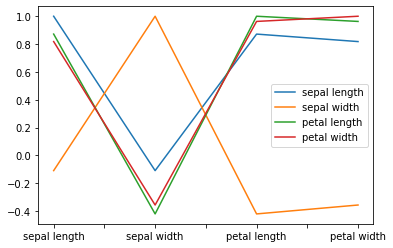

In [20]:
df.corr().plot()

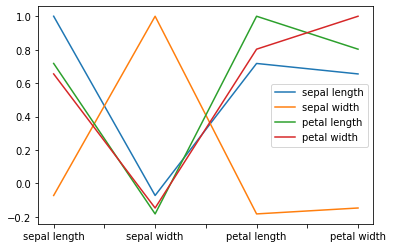

In [21]:
df.corr( method='kendall').plot()

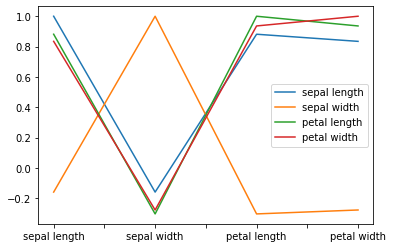

In [22]:
df.corr( method='spearman').plot()

Text(0.5, 1.01, 'Iris Petal Width')

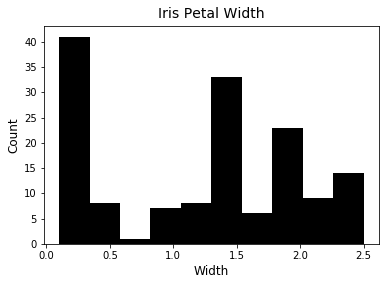

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='black');
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

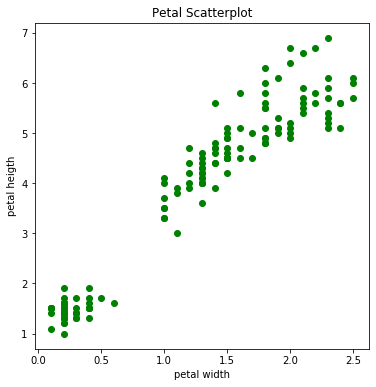

In [24]:
fig, ax = plt.subplots( figsize=( 6,6))
ax.scatter( df['petal width'],df['petal length'], color= 'green')
ax.set_ylabel('petal heigth');
ax.set_xlabel('petal width');
ax.set_title('Petal Scatterplot');

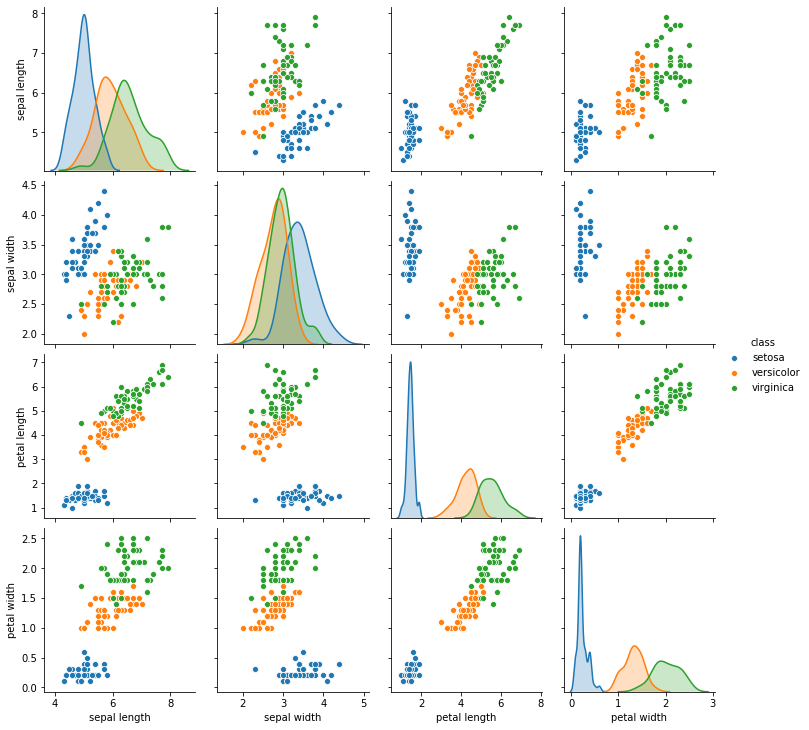

In [26]:
sns.pairplot(df, hue='class');

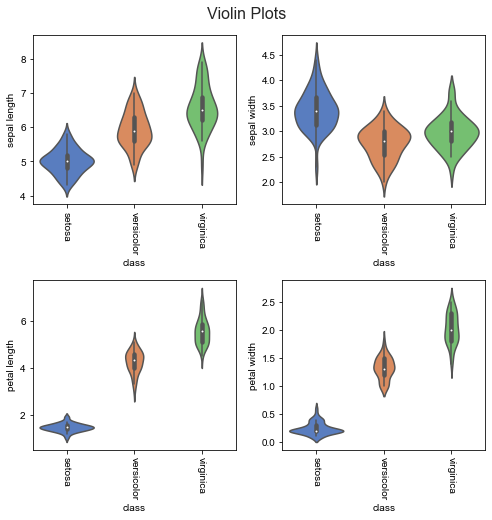

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

In [28]:
df['petal area'] = df.apply( lambda r: r['petal length'] * r['petal width'], axis= 1)

# Sklearn

In [241]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [242]:
X = df.iloc[:, :4]
y = df.iloc[:, 4]

In [243]:
clf = RandomForestClassifier( max_depth=5, n_estimators=10)

In [244]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= .3)

In [245]:
clf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
y_pred = clf.predict(X_test)

In [247]:
rf = pd.DataFrame( list( zip( y_pred, y_test)), columns=['predicted', 'atual'])
rf.head()

,predicted,atual
0,virginica,virginica
1,setosa,setosa
2,versicolor,versicolor
3,virginica,virginica
4,versicolor,versicolor


In [248]:
rf['correct'] = rf.apply( lambda r: 1 if r['predicted'] == r['atual'] else 0, axis= 1)

In [249]:
rf.head()

,predicted,atual,correct
0,virginica,virginica,1
1,setosa,setosa,1
2,versicolor,versicolor,1
3,virginica,virginica,1
4,versicolor,versicolor,1


In [250]:
rf['correct'].sum() / rf['correct'].count()

0.9555555555555556

## Verificando as características mais inportantes.

In [251]:
f_importances = clf.feature_importances_
f_names= df.columns[:4]
f_std = np.std([ three.feature_importances_ for three in clf.estimators_], axis=0)

In [252]:
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

In [253]:
imps = [ x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

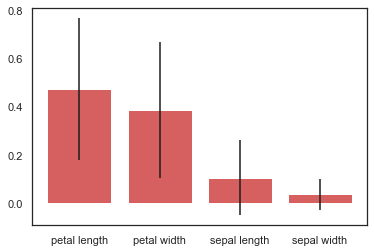

In [254]:
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs,align="center")
plt.xticks(range(len(f_importances)), labels);

# Adicionando SVM

In [255]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [256]:
clf = OneVsRestClassifier( SVC(kernel='linear'))

In [257]:
x = df.iloc[:, :4]
y = np.array(df.iloc[:, 4]).astype(str)

In [258]:
X_train, X_test,y_train, y_test = train_test_split(x,y , test_size=.3)

In [259]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [260]:
y_pred = clf.predict(X_test)

In [261]:
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])

rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)

rf.head()

,predicted,actual,correct
0,virginica,virginica,1
1,virginica,virginica,1
2,setosa,setosa,1
3,setosa,setosa,1
4,versicolor,versicolor,1


In [262]:
rf['correct'].sum()/ rf['correct'].count()

0.8888888888888888